# **Análise Exploratória com Entendimento do Negócio**

A partir da base de dados do projeto com modificações, é feita aqui uma análise de entendimento do negócio.

1. Conversão de Campanhas Anteriores
1. Canal de venda

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [109]:
df = pd.read_csv(filepath_or_buffer='ml_project1_data_NOVO.csv', index_col=0)

In [110]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp2  Complain  Response  Age  \
0  2012-09-04       58       635  ...             0         0         1   57   
1  2014-03-08       38        11  ...             0         0         0   60   
2  2013-08-21       26       426  ...             0         0         0   49   
3  2014-02-10       26        11  ...             0         0         0   30   
4  2014-01-19       94       173  ...             0         0         0   33   

   Time_Customer  SonsTotal  MntTotal  NumPurchases  AcceptedCmp_Anterior  \
0       2.073973          0      1529            22                     0   
1       0.567123          2        21             4                     0   
2       1.112329          0       734            20                     0   
3       0.638356          1        48             6                     0   
4       0.698630          1       407            14                     0   

   AcceptedCmp_Total  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 34 columns]

## Divisão das Features

In [111]:
keys = ['ID']
target = ['Response']

In [118]:
# Características obtidas no cadastro do cliente no sistema
features_cadastro = ['Age', 'Time_Customer', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'SonsTotal']

# Características comportamentais, que são atualizadas no decorrer do histórico de relacionamento do cliente
features_comportamento = ['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntTotal', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumPurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp_Anterior', 'AcceptedCmp_Total', 'Complain']

# Recency
features_recency = ['Recency']

# Monetary
features_monetary = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntTotal']

# Frequency
features_frequency = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumPurchases', 'NumWebVisitsMonth']

# Características relacionadas ao canal de compra
features_canal = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'NumPurchases']

# Características relacionadas às campanhas 
features_campanhas_anteriores = [ 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5' ]

In [153]:
df['Time_Customer'].quantile(q=[0.25, 0.5, 0.75])

0.25    0.752740
0.50    1.231507
0.75    1.706849
Name: Time_Customer, dtype: float64

In [ ]:
df['Time_Customer']

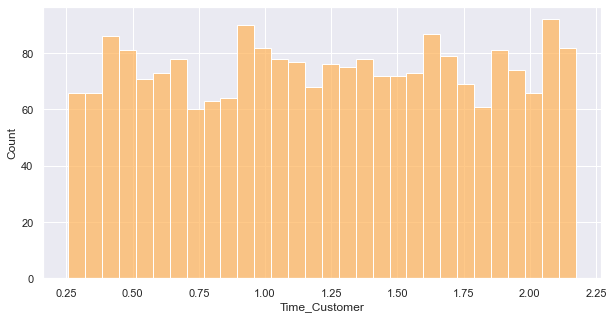

In [150]:
sns.set(rc={'figure.figsize':(10, 5)})
#plt.xlim(-0.5, 30)

sns.histplot(x=df['Time_Customer'], color='#FFB761', bins=30);

In [155]:
df['Age'].mean(), df['Age'].median()

(45.19419642857143, 44.0)

In [161]:
df['Age'].quantile(q=0.1)

30.0

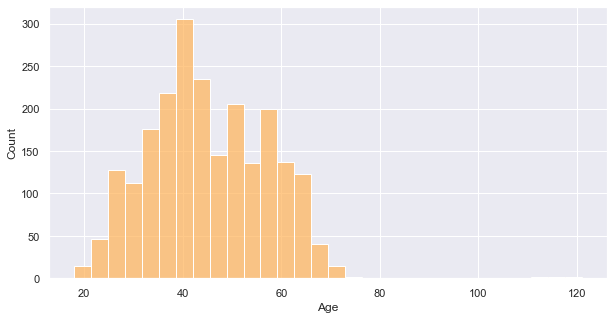

In [154]:
sns.set(rc={'figure.figsize':(10, 5)})

sns.histplot(x=df['Age'], color='#FFB761', bins=30);

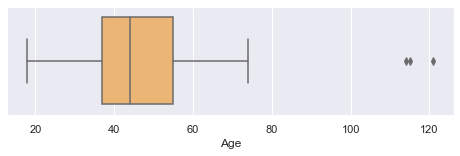

In [166]:
sns.set(rc={'figure.figsize':(8, 2)})

sns.boxplot(x=df['Age'], color='#FFB761');

In [159]:
100*df['Marital_Status'].value_counts(normalize=True)

Married     38.571429
Together    25.892857
Single      21.428571
Divorced    10.357143
Widow        3.437500
Alone        0.133929
YOLO         0.089286
Absurd       0.089286
Name: Marital_Status, dtype: float64

## Canal de venda

In [113]:
print('Média do Percentual do número de compras, por canal de venda:')
100*df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].div(df['NumPurchases'], axis=0).mean()

Média do Percentual do número de compras, por canal de venda:


NumWebPurchases        32.987425
NumCatalogPurchases    16.480892
NumStorePurchases      50.531683
dtype: float64

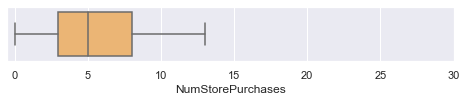

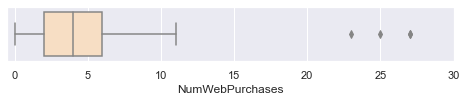

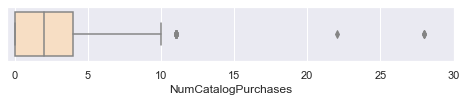

In [116]:
sns.set(rc={'figure.figsize':(8, 1)})
plt.xlim(-0.5, 30)

sns.boxplot(x=df['NumStorePurchases'], color='#FFB761');

plt.figure()
plt.xlim(-0.5, 30)
sns.boxplot(x=df['NumWebPurchases'], color='#FFDEBB');

plt.figure()
plt.xlim(-0.5, 30)

sns.boxplot(x=df['NumCatalogPurchases'], color='#FFDEBB');

## Conversão das campanhas anteriores

In [119]:
for campanha in sorted(features_campanhas_anteriores):
    print('Conversão de %s: %.2f%%'%(campanha, 100*df[campanha].sum()/len(df[campanha])))
    
print()
print('Conversão de pelo menos 1: %.2f%%'%(100*df['AcceptedCmp_Anterior'].sum()/len(df)))

Conversão de AcceptedCmp1: 6.43%
Conversão de AcceptedCmp2: 1.34%
Conversão de AcceptedCmp3: 7.28%
Conversão de AcceptedCmp4: 7.46%
Conversão de AcceptedCmp5: 7.28%

Conversão de pelo menos 1: 20.67%


In [130]:
100*df['AcceptedCmp_Total'].value_counts(normalize=True)

0    79.330357
1    14.508929
2     3.705357
3     1.964286
4     0.491071
Name: AcceptedCmp_Total, dtype: float64

In [121]:
100*df[target].value_counts(normalize=True)

Response
0           85.089286
1           14.910714
dtype: float64

In [104]:
bad_rate.max() - bad_rate.min()

0.9080354921635276

In [135]:
df['Kidhome'].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [88]:
df['Age_quantiles'] = pd.qcut(df['Age'], q=3)

df_bivariada = pd.DataFrame(columns=['volumetria', 'bad_rate'])

df_bivariada['volumetria'] = 100*df['Age_quantiles'].value_counts(normalize=True)
df_bivariada['bad_rate'] = 100*df.groupby(by='Age_quantiles')['Response'].mean()

In [89]:
df_bivariada

volumetria   bad_rate
(17.999, 39.0]   34.732143  15.424165
(50.0, 121.0]    33.214286  14.516129
(39.0, 50.0]     32.053571  14.763231